In [1]:
import pandas as pd
import numpy as np
# List of file names
files = ['weekly_patterns_2018_sample.csv.zip', 
         'weekly_patterns_2019_sample.csv.zip',
         'weekly_patterns_2020_sample.csv.zip', 
         'weekly_patterns_2021_sample.csv.zip',
         'weekly_patterns_2022_sample.csv.zip']


total_obs = 0
for file in files:
    # Read the data
    data = pd.read_csv(file, compression='zip')
    total_obs += len(data)
print(total_obs)
data.dtypes
chilis_obs = 0
chilis_df = pd.DataFrame() #initializing an empty df

for file in files:
    # Read the data
    data = pd.read_csv(file, compression='zip')
    
    # Filter the data for Chili's Grill & Bar
    data = data.loc[data['brands'].isin(["Chili's Grill & Bar"])]
    
    # Concatenate the data
    chilis_df = pd.concat([chilis_df, data], ignore_index = True)
    
    chilis_obs = len(chilis_df)
    
print(chilis_obs)
from datetime import datetime, date, timedelta
chilis_df['date_range_start'] = chilis_df['date_range_start'].str[:10]
chilis_df['date_range_end'] = chilis_df['date_range_end'].str[:10]
chilis_df.head(5)

chilis_df['year'] = chilis_df['date_range_start'].str[:4]
chilis_df['date_range_start'] = pd.to_datetime(chilis_df
                                               ['date_range_start'])
chilis_df['date_range_end'] =  pd.to_datetime(chilis_df
                                              ['date_range_end'])
# Split the variable visits_by_day into new variables
chilis_df[['dailyvisits0', 'dailyvisits1', 'dailyvisits2'
           , 'dailyvisits3',
    'dailyvisits4', 'dailyvisits5', 
           'dailyvisits6']] = chilis_df['visits
                                        _by_day'].str.split(',', expand=True)
chilis_df['dailyvisits0'] = chilis_df['dailyvisits0'].str[1:3]
chilis_df['dailyvisits6'] = chilis_df['dailyvisits6'].str[0:2]

chilis_df['dailyvisits0'] = chilis_df['dailyvisits0'].astype(float)
chilis_df['dailyvisits1'] = chilis_df['dailyvisits1'].astype(float)
chilis_df['dailyvisits2'] = chilis_df['dailyvisits2'].astype(float)
chilis_df['dailyvisits3'] = chilis_df['dailyvisits3'].astype(float)
chilis_df['dailyvisits4'] = chilis_df['dailyvisits4'].astype(float)
chilis_df['dailyvisits5'] = chilis_df['dailyvisits5'].astype(float)

chilis_df['dailyvisits6'] = chilis_df['dailyvisits6'].str.replace(']', '')

chilis_df['dailyvisits6'] = chilis_df['dailyvisits6'].astype(float)

chilis_df['id'] = chilis_df.index
chilis_df['index'] = chilis_df.index
long_chilis_df = pd.wide_to_long(chilis_df,
                                 ['dailyvisits'
                                 ], i = 'index', j = 'day', sep = '')
long_chilis_df['dailyvisits'] = long_chilis_df['dailyvisits'].astype(int)
agg = long_chilis_df.groupby(['year']).agg(
{'dailyvisits': 'mean' })

long_chilis_df = long_chilis_df.reset_index()

long_chilis_df['date'] = long_chilis_df['date_range_start'
                                       ] + pd.to_timedelta(long_chilis_df['day'],
                                                           unit='D')

long_chilis_df['dayoftheweek'] = long_chilis_df['date'].dt.day_name()
threshold = 34 #I chose this threshold because 25% of the data will be greater than it: 
                #this gets the top quartile

long_chilis_df['manyvisits'] = np.where(long_chilis_df['dailyvisits'] > threshold, 1, 0)
table = pd.crosstab(long_chilis_df['region'] , long_chilis_df['manyvisits'] )
tablepercent = pd.crosstab(long_chilis_df['region'] , long_chilis_df['manyvisits'] ,
                           normalize = 'index')*100
#same table as above but with percentages instead of total number counts
#Done to control for state size and see which states have best performing resturants
long_chilis_df['core_biz_area'] = np.where((long_chilis_df['region'] == 'AL')
                                           | (long_chilis_df['region'] =='AR')
                                           | (long_chilis_df['region'] =='FL') 
                                           | (long_chilis_df['region'] =='GA')
                                           |(long_chilis_df['region'] == 'KS') 
                                           | (long_chilis_df['region'] =='LA')
                                           |(long_chilis_df['region'] == 'MI') 
                                           |(long_chilis_df['region'] == 'MO') 
                                           |(long_chilis_df['region'] == 'MS') 
                                           | (long_chilis_df['region'] =='NC') 
                                           |(long_chilis_df['region'] =='OK') 
                                           |(long_chilis_df['region'] == 'TX') 
                                           |(long_chilis_df['region'] == 'WV'), 1, 0)

long_chilis_df.head()

core_agg = long_chilis_df.groupby(['core_biz_area']).agg(
{'dailyvisits': 'mean' })

core_agg.head()

6462235
56242


,dailyvisits
core_biz_area,
0,20.259687
1,32.834660


In [2]:

long_chilis_df.head()

,index,day,id,naics_code,region,raw_visit_counts,postal_code,city,safegraph_brand_ids,placekey,visits_by_day,date_range_start,date_range_end,year,brands,dailyvisits,date,dayoftheweek,manyvisits,core_biz_area
0,0,0,0,722511,MO,261,64081,Lees Summit,SG_BRAND_072efa4069c7217d82229845c60e6a0d,222-222@5pr-4pg-9fz,"[26,1,43,45,52,53,41]",2018-12-24,2018-12-31,2018,Chili's Grill & Bar,26,2018-12-24,Monday,0,1
1,1,0,1,722511,TX,138,75455,Mount Pleasant,SG_BRAND_072efa4069c7217d82229845c60e6a0d,223-222@8f2-sqt-kj9,"[10,24,14,13,23,24,30]",2018-08-27,2018-09-03,2018,Chili's Grill & Bar,10,2018-08-27,Monday,0,1
2,2,0,2,722511,IL,111,61614,Peoria,SG_BRAND_072efa4069c7217d82229845c60e6a0d,223-222@5pv-mqc-t5f,"[10,10,16,15,21,16,23]",2018-03-19,2018-03-26,2018,Chili's Grill & Bar,10,2018-03-19,Monday,0,0
3,3,0,3,722511,NH,113,3820,Dover,SG_BRAND_072efa4069c7217d82229845c60e6a0d,zzw-222@62j-wsq-ysq,"[13,15,18,9,26,19,13]",2018-05-07,2018-05-14,2018,Chili's Grill & Bar,13,2018-05-07,Monday,0,0
4,4,0,4,722511,TX,175,76039,Euless,SG_BRAND_072efa4069c7217d82229845c60e6a0d,228-222@5qv-x6c-gzf,"[26,14,34,9,34,34,24]",2018-02-12,2018-02-19,2018,Chili's Grill & Bar,26,2018-02-12,Monday,0,1


Above is the cleaned long sample from project 1.

In [3]:
long_chilis_df['weekend'] = np.where((long_chilis_df['dayoftheweek'] == 'Saturday')
                                           | (long_chilis_df['dayoftheweek']
                                              =='Sunday'),1,0)

In [4]:
long_chilis_df['weekend'].value_counts() # number of weekends/weekdays checks out, 
#sanity check completed

weekend
0    281210
1    112484
Name: count, dtype: int64

In [5]:
long_chilis_df.to_csv('Long_sample.csv', index=False)

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [7]:
long = pd.read_csv('Long_sample.csv')
long['date'] = long['date'].astype('datetime64[ns]')
long['date_range_start'] = long['date_range_start'].astype('datetime64[ns]')
long.head()

,index,day,id,naics_code,region,raw_visit_counts,postal_code,city,safegraph_brand_ids,placekey,...,date_range_start,date_range_end,year,brands,dailyvisits,date,dayoftheweek,manyvisits,core_biz_area,weekend
0,0,0,0,722511,MO,261,64081,Lees Summit,SG_BRAND_072efa4069c7217d82229845c60e6a0d,222-222@5pr-4pg-9fz,...,2018-12-24,2018-12-31,2018,Chili's Grill & Bar,26,2018-12-24,Monday,0,1,0
1,1,0,1,722511,TX,138,75455,Mount Pleasant,SG_BRAND_072efa4069c7217d82229845c60e6a0d,223-222@8f2-sqt-kj9,...,2018-08-27,2018-09-03,2018,Chili's Grill & Bar,10,2018-08-27,Monday,0,1,0
2,2,0,2,722511,IL,111,61614,Peoria,SG_BRAND_072efa4069c7217d82229845c60e6a0d,223-222@5pv-mqc-t5f,...,2018-03-19,2018-03-26,2018,Chili's Grill & Bar,10,2018-03-19,Monday,0,0,0
3,3,0,3,722511,NH,113,3820,Dover,SG_BRAND_072efa4069c7217d82229845c60e6a0d,zzw-222@62j-wsq-ysq,...,2018-05-07,2018-05-14,2018,Chili's Grill & Bar,13,2018-05-07,Monday,0,0,0
4,4,0,4,722511,TX,175,76039,Euless,SG_BRAND_072efa4069c7217d82229845c60e6a0d,228-222@5qv-x6c-gzf,...,2018-02-12,2018-02-19,2018,Chili's Grill & Bar,26,2018-02-12,Monday,0,1,0


In [8]:
long['dailyvisits'].describe()

count    393694.000000
mean         26.405419
std          27.093758
min           0.000000
25%          13.000000
50%          22.000000
75%          34.000000
max         819.000000
Name: dailyvisits, dtype: float64

dailyvisits has a mean of 26.4, min of 0, and max of 819

In [9]:
long['dailyvisits'].value_counts()

dailyvisits
16     11399
18     11314
17     11253
15     11104
19     11009
       ...  
617        1
504        1
595        1
546        1
169        1
Name: count, Length: 579, dtype: int64

In [10]:
dv0 = len(np.where(long['dailyvisits'] == 0)[0])
print(dv0)

7547


there are 7547 occurences of dailyvisits equaling 0

In [11]:
dv100ormore = len(np.where(long['dailyvisits'] > 99)[0])
print(dv100ormore)

2711


there are 2711 occurences of dailyvisits being >= 100

we know from the describe function that dailyvisits has a max
of 819, thus is never greater than 1000.

<IPython.core.display.Javascript object>


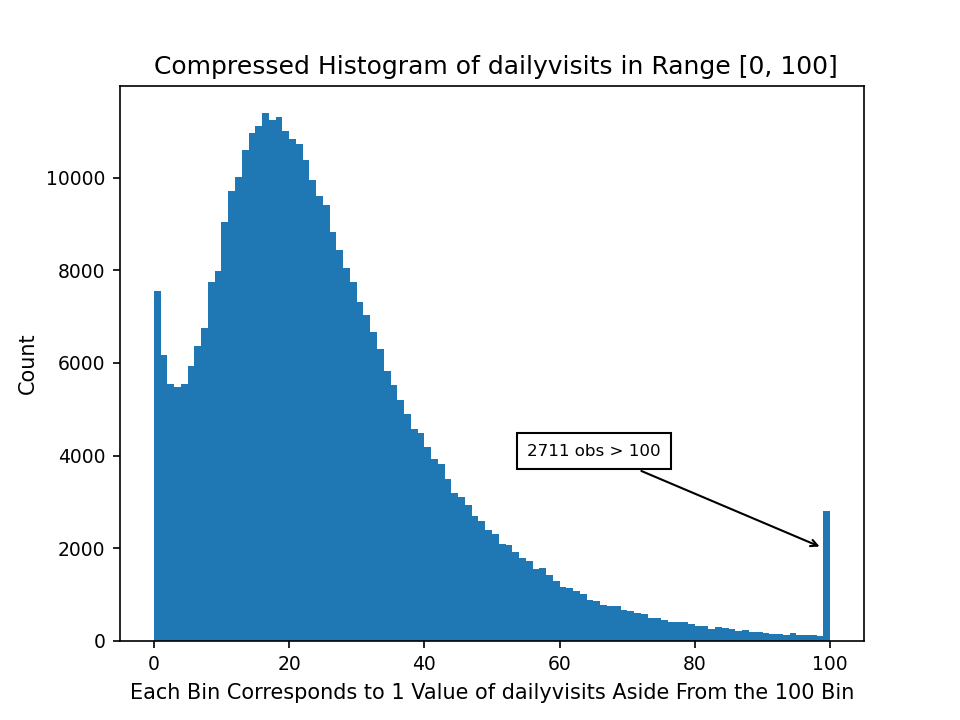

In [12]:
a = np.clip(long['dailyvisits'], 0, 100, out=None)
plt.figure()
plt.ylabel('Count')
plt.xlabel('Each Bin Corresponds to 1 Value of dailyvisits Aside From the 100 Bin')
plt.title(' Compressed Histogram of dailyvisits in Range [0, 100]')
plt.yticks(fontsize = 9)
plt.xticks(fontsize = 9)

plt.annotate('2711 obs > 100',
xy = (99, 2000),
xytext = (75, 4000),
arrowprops=dict(arrowstyle='->'),
bbox=dict(pad=5, fc = 'white'),
color = 'black', fontsize = 8,
horizontalalignment='right');

plt.hist(a, bins = 100,);

100 bins for the range 0-100 felt like the most natural so that every number gets its own "bin"
this allows for the most precise and accurate histogram. The 100th bin is so large
because it accounts for every single obs>100. The annotation makes this clear to any reader.
The sub group of 1-100 made the most sense because 100 is really the point where the distribution
really tails off, and 100 is a common cutoff point that makes for a nice, familiar visualization

In [13]:
long_weekday = long.loc[long['weekend'] == 0]
long_weekend = long.loc[long['weekend'] == 1]

<IPython.core.display.Javascript object>


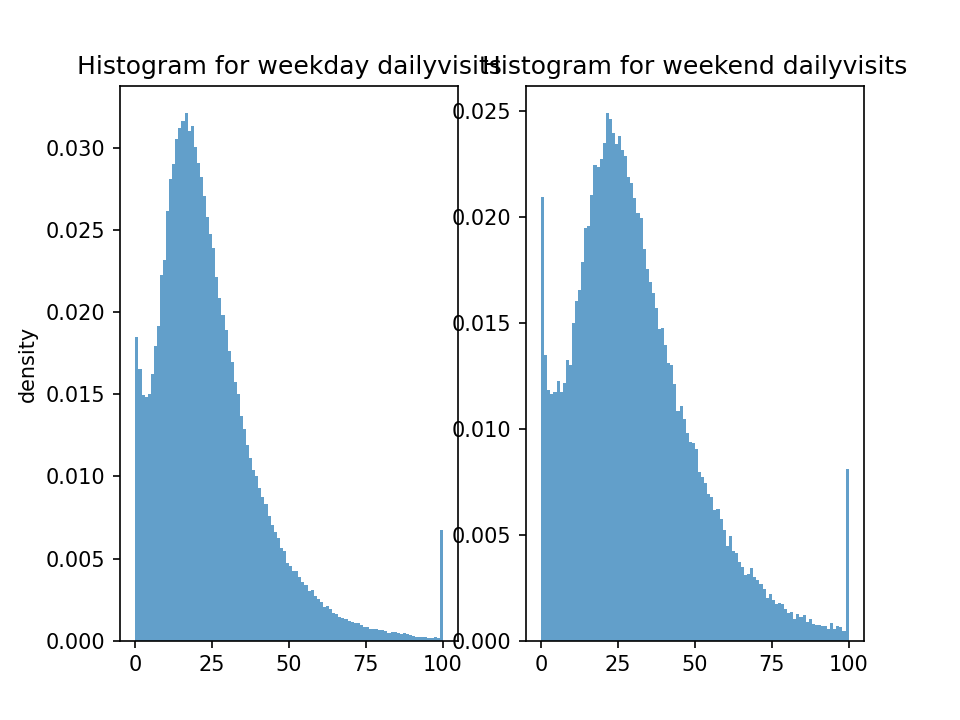

In [54]:
aa = np.clip(long_weekday['dailyvisits'], 0, 100, out=None)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(aa,
bins = 100,
density=True,
alpha = 0.7);
ax1.set_title('Histogram for weekday dailyvisits');
ax1.set_ylabel('density')
ab = np.clip(long_weekend['dailyvisits'], 0, 100, out = None)
ax2.hist(ab,
bins = 100,
density=True,
alpha = 0.7);
ax2.set_title('Histogram for weekend dailyvisits');
# ax1 and ax2 share the same y-label


<IPython.core.display.Javascript object>


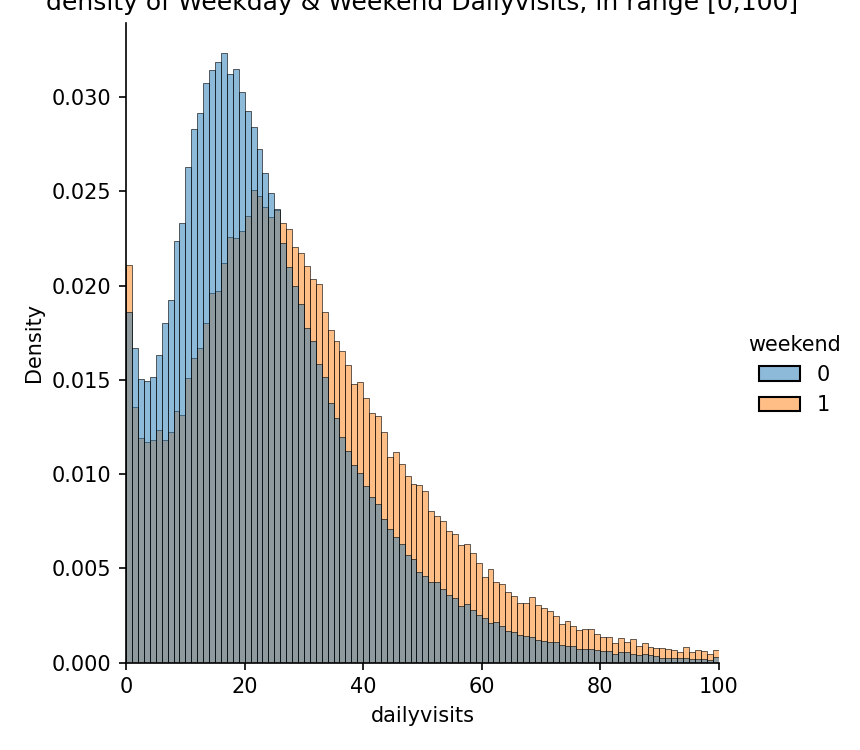

C:\Users\mattm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [15]:
import seaborn as sns
sns.displot(long.loc[long['dailyvisits'] <= 100],
x = 'dailyvisits',
hue="weekend",
bins = 100,
stat='density',
common_norm = False)
plt.xlim([0, 100]);
plt.title('density of Weekday & Weekend Dailyvisits, in range [0,100]');

one difference between the 2 histograms is that the weekend data has a similar shape to 
the weekday one, but with a lower peak, and shifted to the right. Also, the weekend 
histogram doesn't have as steep of a dropoff compared to the weekday one. This suggests 
that the days with a higher than average dailyvisits are biased towards being a weekend

<IPython.core.display.Javascript object>


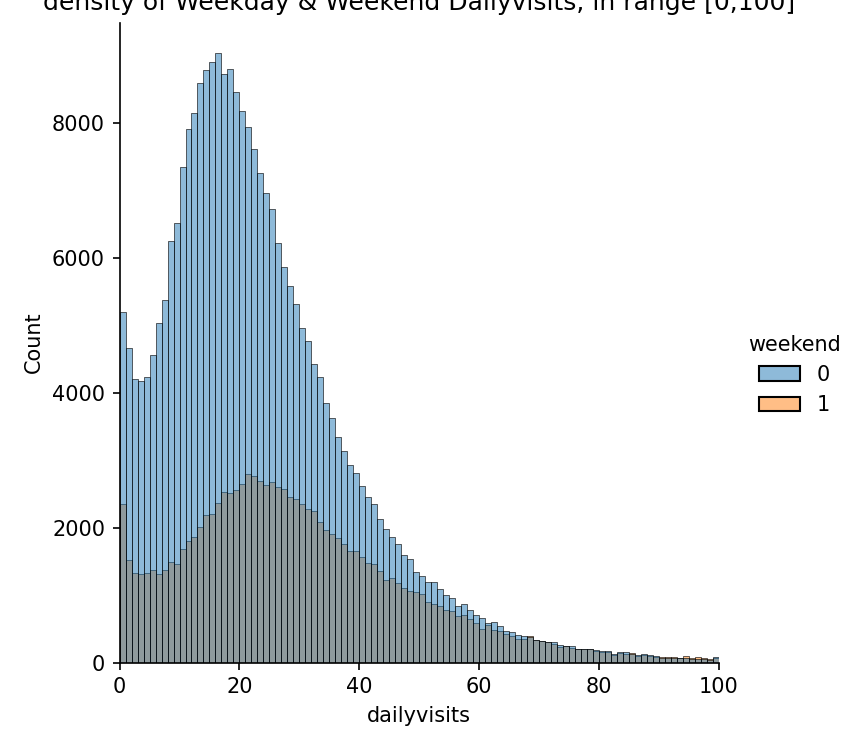

C:\Users\mattm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [16]:
import seaborn as sns
sns.displot(long.loc[long['dailyvisits'] <= 100],
x = 'dailyvisits',
hue="weekend",
bins = 100,
stat='count',
common_norm = False)
plt.xlim([0, 100]);
plt.title('density of Weekday & Weekend Dailyvisits, in range [0,100]');

In [17]:
dv_sum = long[['dayoftheweek', 'dailyvisits']].groupby('dayoftheweek').sum()
dv_sum

,dailyvisits
dayoftheweek,
Friday,1933791
Monday,1116779
Saturday,1939604
Sunday,1500312
Thursday,1379677
Tuesday,1223982
Wednesday,1301510


<IPython.core.display.Javascript object>


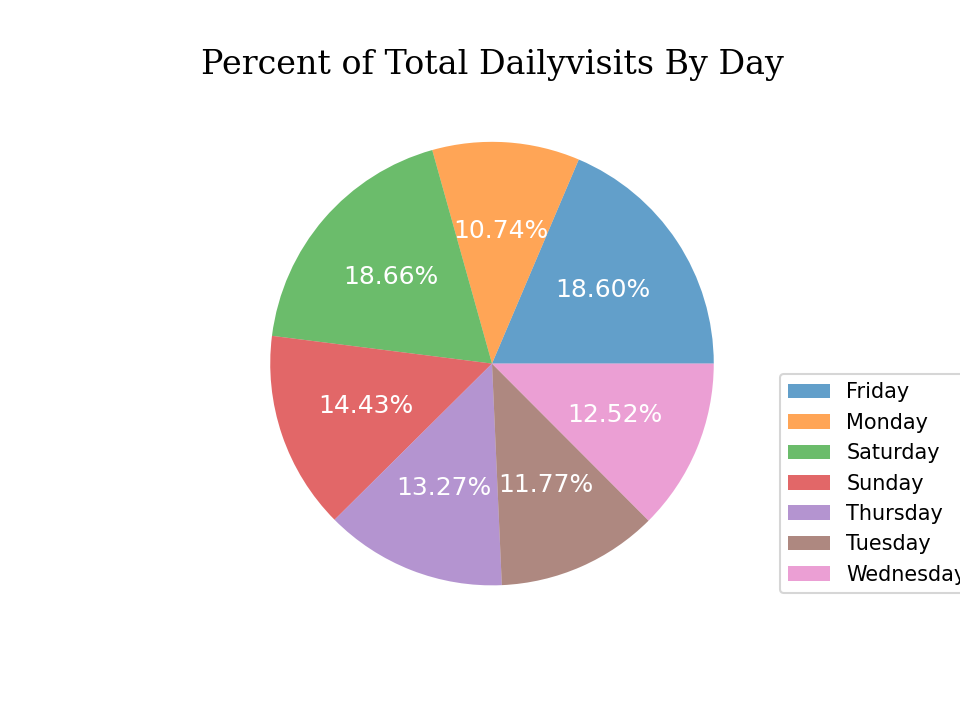

In [18]:
plt.figure()
plt.pie(dv_sum['dailyvisits'],
labels = dv_sum.index,
autopct='%.2f%%',
textprops={'color':'w', 'fontsize': 12},
wedgeprops={'alpha':0.7})
plt.title('Percent of Total Dailyvisits By Day',
fontsize = 16,
fontname = 'serif');#In [56]:
# Display the legend in a nicer way (s.t. it doesn't overlap with plot)
plt.legend(bbox_to_anchor=(1,0.5)),
loc="center right",
fontsize=10,


In [19]:
region_ = long[['dailyvisits', 'region']].groupby(['region']).mean()
region_.reset_index(inplace = True)
region_

,region,dailyvisits
0,AL,43.065681
1,AR,54.011677
2,AZ,23.094347
3,CA,16.102100
4,CO,17.630370
5,CT,9.120690
6,DE,22.759715
7,FL,30.402094
8,GA,30.724179
9,HI,18.132458


<IPython.core.display.Javascript object>


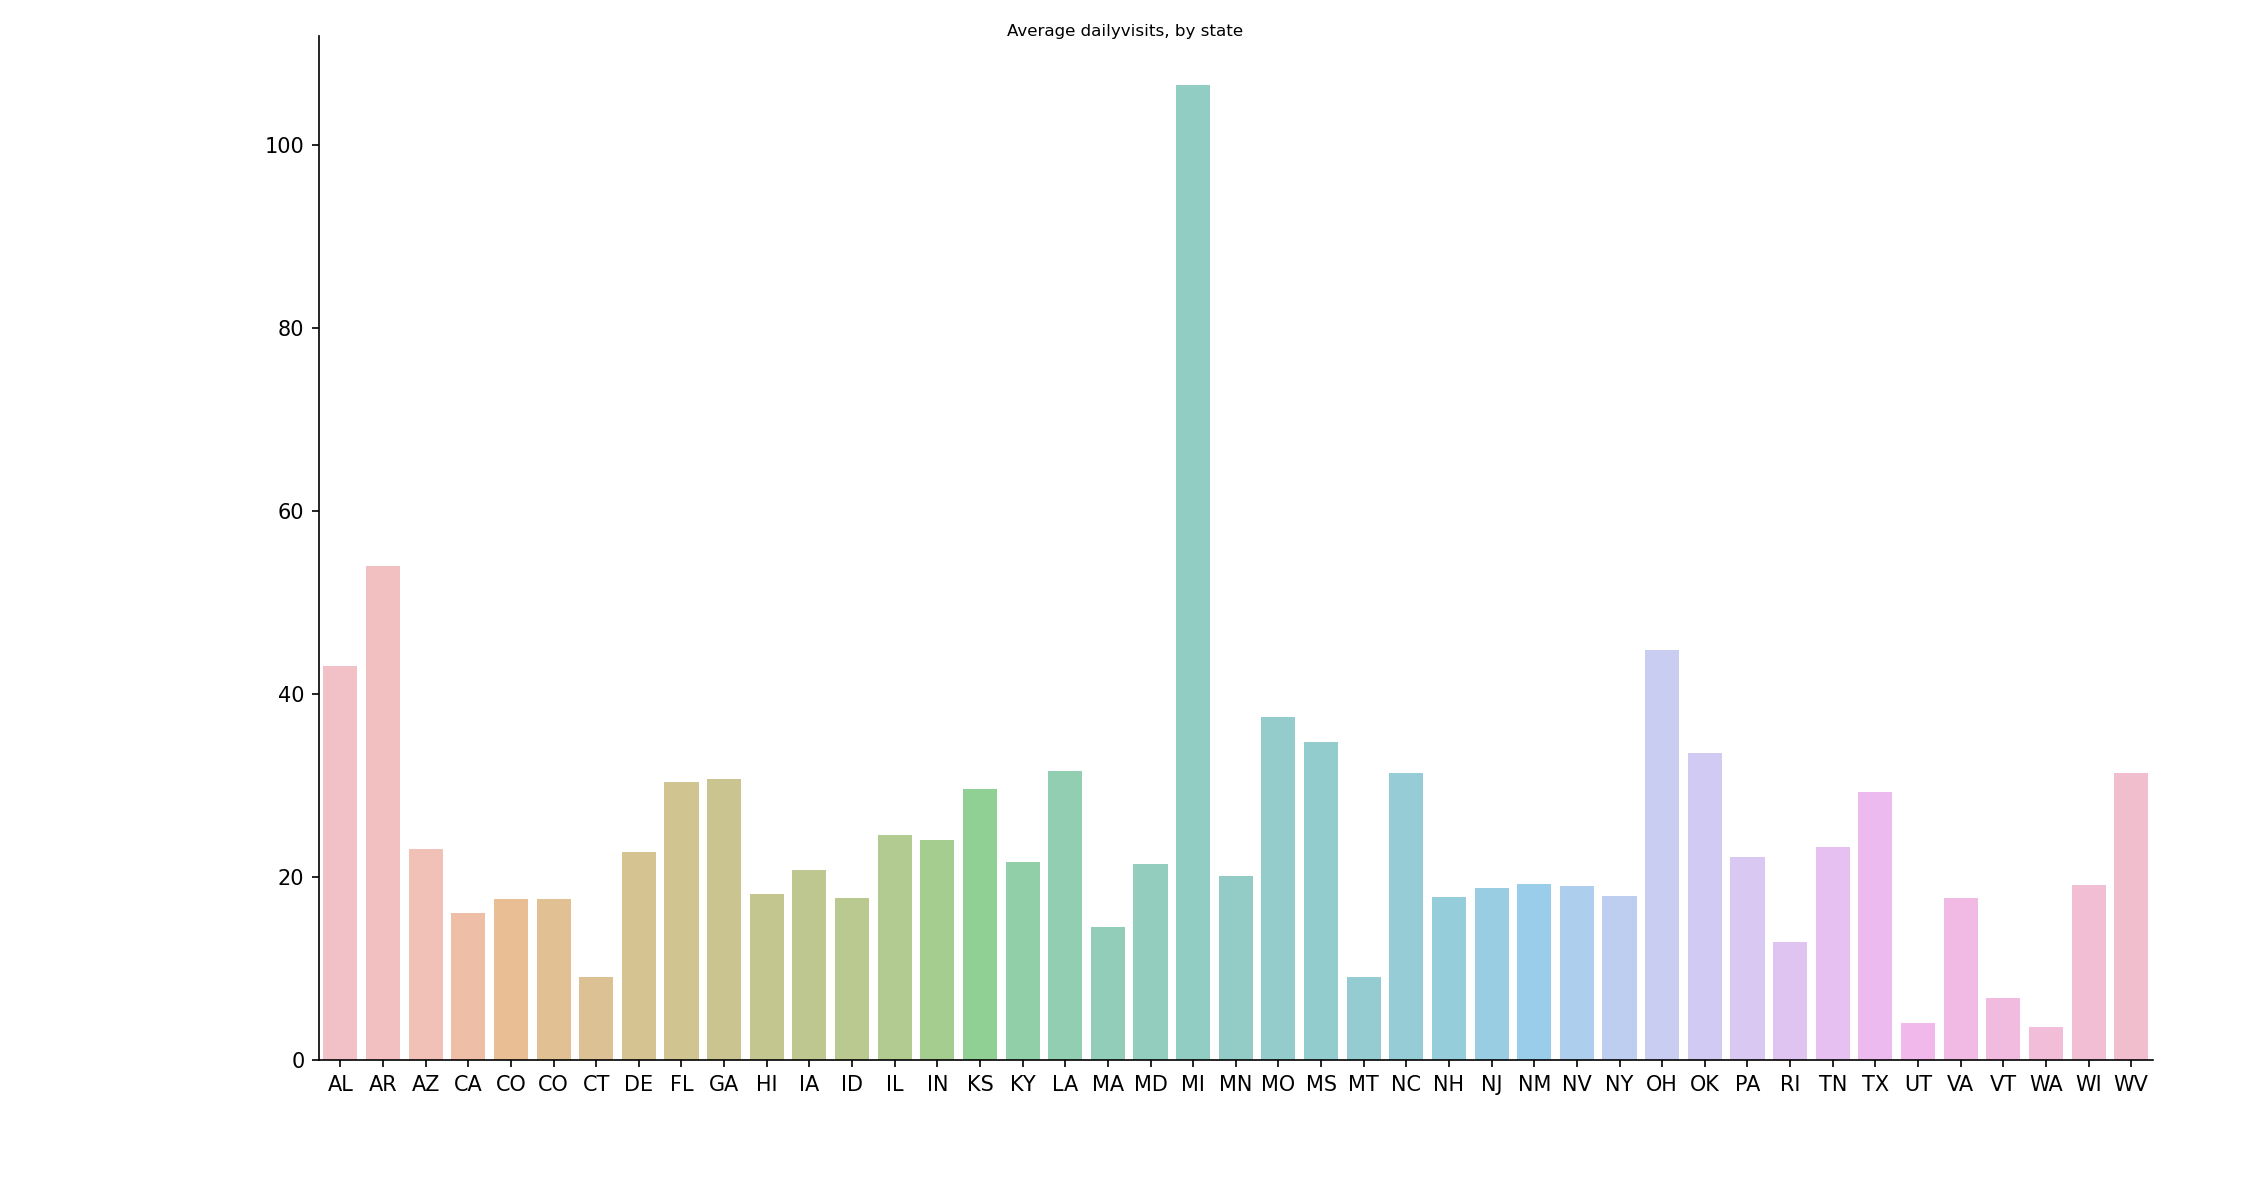

C:\Users\mattm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [20]:
myplot = sns.catplot(
data=region_, kind='bar',
x='region', y='dailyvisits',
order = ['AL', 'AR', 'AZ', 'CA', 'CO', 'CO', 'CT', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NH', 'NJ', 'NM', 'NV',
        'NY', 'OH', 'OK', 'PA', 'RI', 'TN', 'TX', 'UT', 'VA', 'VT',
        'WA', 'WI', 'WV'],
alpha=.6)
myplot.set_axis_labels("", "")
myplot.fig.suptitle("Average dailyvisits, by state",
fontsize=8);
plt.gcf().set_size_inches(15,8)

In [21]:
long['period'] = ['before' if x < pd.Timestamp('2020-03-13') else 'after' for x in long['date']]

<IPython.core.display.Javascript object>


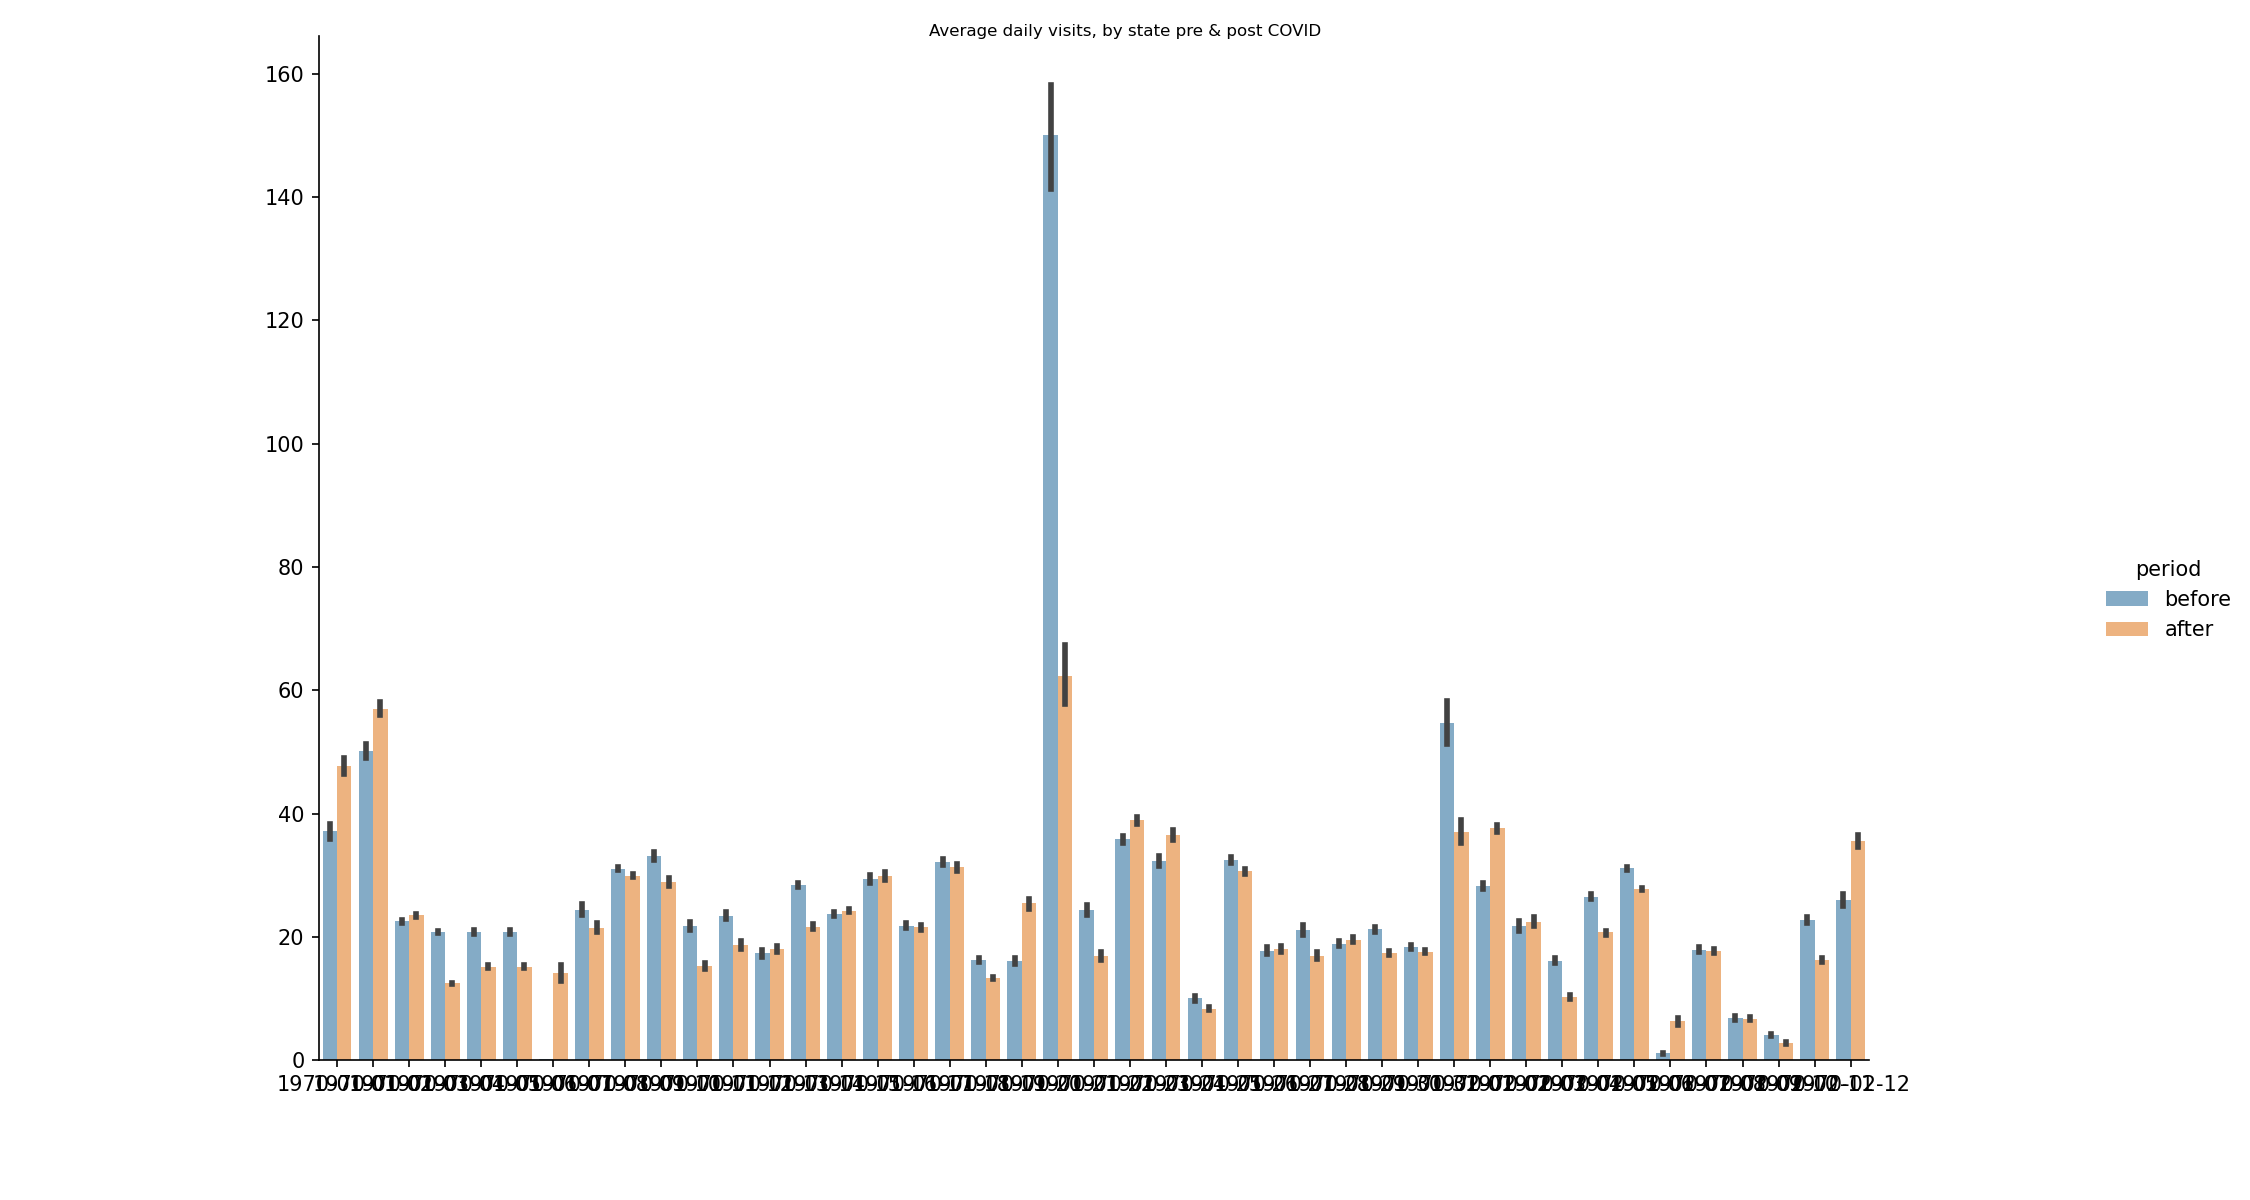

C:\Users\mattm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [22]:
myplot = sns.catplot(
    data=long, kind='bar',
    x='region', y='dailyvisits', hue='period',
    order = ['AL', 'AR', 'AZ', 'CA', 'CO', 'CO', 'CT', 'DE', 'FL', 'GA',
            'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
            'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NH', 'NJ', 'NM', 'NV',
            'NY', 'OH', 'OK', 'PA', 'RI', 'TN', 'TX', 'UT', 'VA', 'VT',
            'WA', 'WI', 'WV'],
    alpha=.6)
myplot.set_axis_labels("", "")
myplot.fig.suptitle("Average daily visits, by state pre & post COVID",
fontsize=8)
plt.gcf().set_size_inches(15,8)

One thing I noticed is that while in most states the post covid dailyvisits is lower
in almost half there is a similar amount or in some cases more dailyvisits after. 
While this seems nonsensical, some states may have had new chilis locations
open in 2021 or 2022 so that would lead to inconsistency in the data. Also,
I know Chili's has a big takeout business, so when COVID hit this could have
Potentially gave their takeout a boost. 

In [23]:
long['year-month'] = long['date'].astype(str).str[:7].astype('datetime64[ns]')
d1 = long.groupby(['placekey', 'year-month'])['dailyvisits'].sum().reset_index()
monthly_visits = d1.groupby('year-month')['dailyvisits'].mean().reset_index().rename(
    columns = {'dailyvisits': 'monthly_visits_avg'})
monthly_visits.head(63)

,year-month,monthly_visits_avg
0,2018-01-01,535.345622
1,2018-02-01,564.032258
2,2018-03-01,731.774194
3,2018-04-01,776.439815
4,2018-05-01,765.356481
...,...,...
56,2022-09-01,713.093458
57,2022-10-01,745.720930
58,2022-11-01,699.069444
59,2022-12-01,861.837963


In [24]:
d1.head()

,placekey,year-month,dailyvisits
0,222-222@5pb-kb2-5zz,2018-01-01,442
1,222-222@5pb-kb2-5zz,2018-02-01,430
2,222-222@5pb-kb2-5zz,2018-03-01,614
3,222-222@5pb-kb2-5zz,2018-04-01,570
4,222-222@5pb-kb2-5zz,2018-05-01,657


In [25]:
long.head()

,index,day,id,naics_code,region,raw_visit_counts,postal_code,city,safegraph_brand_ids,placekey,...,year,brands,dailyvisits,date,dayoftheweek,manyvisits,core_biz_area,weekend,period,year-month
0,0,0,0,722511,MO,261,64081,Lees Summit,SG_BRAND_072efa4069c7217d82229845c60e6a0d,222-222@5pr-4pg-9fz,...,2018,Chili's Grill & Bar,26,2018-12-24,Monday,0,1,0,before,2018-12-01
1,1,0,1,722511,TX,138,75455,Mount Pleasant,SG_BRAND_072efa4069c7217d82229845c60e6a0d,223-222@8f2-sqt-kj9,...,2018,Chili's Grill & Bar,10,2018-08-27,Monday,0,1,0,before,2018-08-01
2,2,0,2,722511,IL,111,61614,Peoria,SG_BRAND_072efa4069c7217d82229845c60e6a0d,223-222@5pv-mqc-t5f,...,2018,Chili's Grill & Bar,10,2018-03-19,Monday,0,0,0,before,2018-03-01
3,3,0,3,722511,NH,113,3820,Dover,SG_BRAND_072efa4069c7217d82229845c60e6a0d,zzw-222@62j-wsq-ysq,...,2018,Chili's Grill & Bar,13,2018-05-07,Monday,0,0,0,before,2018-05-01
4,4,0,4,722511,TX,175,76039,Euless,SG_BRAND_072efa4069c7217d82229845c60e6a0d,228-222@5qv-x6c-gzf,...,2018,Chili's Grill & Bar,26,2018-02-12,Monday,0,1,0,before,2018-02-01


In [26]:
pd.to_datetime(monthly_visits['year-month'])

0    2018-01-01
1    2018-02-01
2    2018-03-01
3    2018-04-01
4    2018-05-01
        ...    
56   2022-09-01
57   2022-10-01
58   2022-11-01
59   2022-12-01
60   2023-01-01
Name: year-month, Length: 61, dtype: datetime64[ns]

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

 #Set date formatting
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Create a new figure
#plt.figure()

# Plot the mean
#plt.plot(monthly_visits['year-month'], monthly_visits['monthly_visits_avg'],'-o', label='mean')

#monthly_visits_guy = long.groupby('year-month').agg(
 #   {'monthlyvisits': [q25, q75, 'median', 'mean']})

# Plot the percentiles
#plt.plot(monthly_visits_guy.index, monthly_visits_guy['q25'], '-', label='25% quantile')
#plt.plot(monthly_visits_guy.index, monthly_visits_guy['q75'], '-', label='75% quantile')
#plt.plot(monthly_visits_guy.index, monthly_visits_guy['median'], '-', label='median')

# Customize the plot
#plt.xticks(rotation=30)
#plt.subplots_adjust(bottom=0.2)
#plt.legend(loc=0, facecolor='white', framealpha=0.3)
#plt.title('Monthly Visits Statistics (2018 - 2022)', y=1.05)


Commented out above code because It was throwing and error, and I couldn't
fix it. The error always came from this line of code:
monthly_visits_guy = long.groupby('year-month').agg(
   {'monthlyvisits': [q25, q75, 'median', 'mean']})

<IPython.core.display.Javascript object>


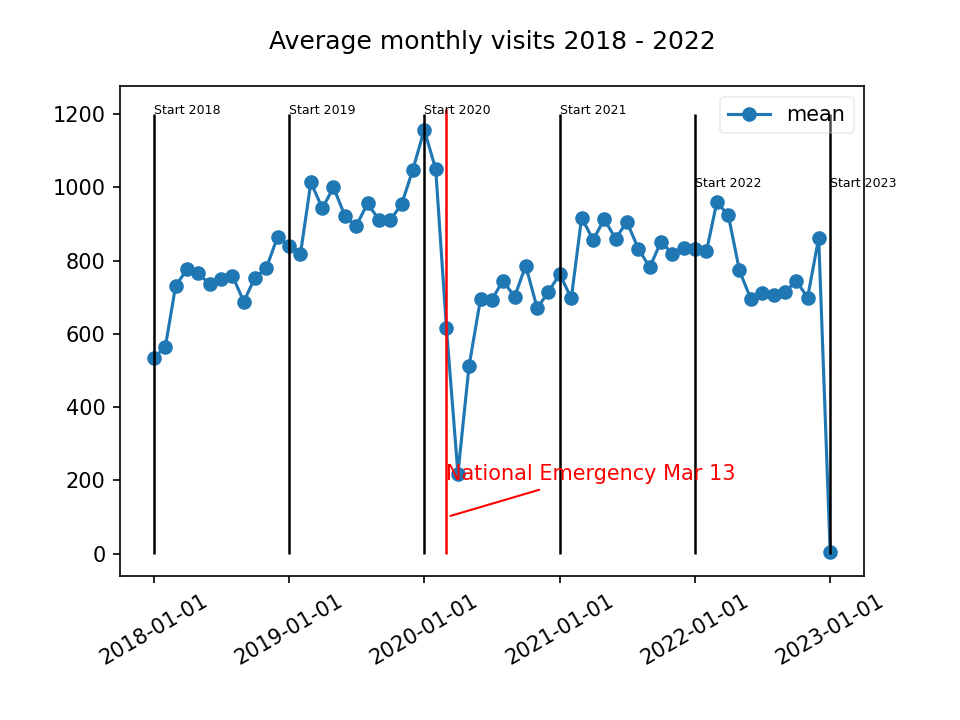

In [28]:
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.figure()
plt.plot(monthly_visits['year-month'], monthly_visits['monthly_visits_avg'], '-o', label = 'mean')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=30)
plt.subplots_adjust(bottom = 0.2)
plt.legend(loc = 0, facecolor='white', 
           framealpha = 0.3)
plt.title('Average monthly visits 2018 - 2022', y=1.05);
plt.vlines(x = pd.to_datetime('2020-03-01'),
           ymin = 0, ymax = plt.ylim()[1],
          linestyle = '-', color = 'r', lw = 1.2)

In [29]:
plt.annotate('National Emergency Mar 13', 
             xy = (pd.to_datetime('2020-03-01'), 100),
             xytext= (pd.to_datetime('2020-03-01'), 200),
             arrowprops=dict(arrowstyle = '-', color = 'red'),
            color = 'red', fontsize = 10);

In [30]:
plt.vlines(x = pd.to_datetime('2019-01-01'),
           ymin = 0, ymax = 1200,
          linestyle = '-', color = 'black', lw = 1.2)
plt.annotate('Start 2019', 
             xy = (pd.to_datetime('2019-01-01'), 1200),
             xytext= (pd.to_datetime('2019-01-01'), 1200),
             #arrowprops=dict(arrowstyle = '-', color = 'red'),
            color = 'black', fontsize = 6);

In [31]:
plt.vlines(x = pd.to_datetime('2020-01-01'),
           ymin = 0, ymax = 1200,
          linestyle = '-', color = 'black', lw = 1.2)
plt.annotate('Start 2020', 
             xy = (pd.to_datetime('2020-01-01'), 1200),
             xytext= (pd.to_datetime('2020-01-01'), 1200),
             #arrowprops=dict(arrowstyle = '-', color = 'red'),
            color = 'black', fontsize = 6);

In [32]:
plt.vlines(x = pd.to_datetime('2021-01-01'),
           ymin = 0, ymax = 1200,
          linestyle = '-', color = 'black', lw = 1.2)
plt.annotate('Start 2021', 
             xy = (pd.to_datetime('2021-01-01'), 1200),
             xytext= (pd.to_datetime('2021-01-01'), 1200),
             #arrowprops=dict(arrowstyle = '-', color = 'red'),
            color = 'black', fontsize = 6);

In [33]:
plt.vlines(x = pd.to_datetime('2022-01-01'),
           ymin = 0, ymax = 1200,
          linestyle = '-', color = 'black', lw = 1.2)
plt.annotate('Start 2022', 
             xy = (pd.to_datetime('2022-01-01'), 1000),
             xytext= (pd.to_datetime('2022-01-01'), 1000),
             #arrowprops=dict(arrowstyle = '-', color = 'red'),
            color = 'black', fontsize = 6);

In [34]:
plt.vlines(x = pd.to_datetime('2018-01-01'),
           ymin = 0, ymax = 1200,
          linestyle = '-', color = 'black', lw = 1.2)
plt.annotate('Start 2018', 
             xy = (pd.to_datetime('2018-01-01'), 1200),
             xytext= (pd.to_datetime('2018-01-01'), 1200),
             #arrowprops=dict(arrowstyle = '-', color = 'red'),
            color = 'black', fontsize = 6);

In [35]:
plt.vlines(x = pd.to_datetime('2023-01-01'),
           ymin = 0, ymax = 1200,
          linestyle = '-', color = 'black', lw = 1.2)
plt.annotate('Start 2023', 
             xy = (pd.to_datetime('2023-01-01'), 1000),
             xytext= (pd.to_datetime('2023-01-01'), 1000),
             #arrowprops=dict(arrowstyle = '-', color = 'red'),
            color = 'black', fontsize = 6);

In [36]:
long['monthlyvisits'] = long['raw_visit_counts']*4

In [37]:
long['monthlyvisits'] = long['raw_visit_counts']*4

In [38]:
long.head()

,index,day,id,naics_code,region,raw_visit_counts,postal_code,city,safegraph_brand_ids,placekey,...,brands,dailyvisits,date,dayoftheweek,manyvisits,core_biz_area,weekend,period,year-month,monthlyvisits
0,0,0,0,722511,MO,261,64081,Lees Summit,SG_BRAND_072efa4069c7217d82229845c60e6a0d,222-222@5pr-4pg-9fz,...,Chili's Grill & Bar,26,2018-12-24,Monday,0,1,0,before,2018-12-01,1044
1,1,0,1,722511,TX,138,75455,Mount Pleasant,SG_BRAND_072efa4069c7217d82229845c60e6a0d,223-222@8f2-sqt-kj9,...,Chili's Grill & Bar,10,2018-08-27,Monday,0,1,0,before,2018-08-01,552
2,2,0,2,722511,IL,111,61614,Peoria,SG_BRAND_072efa4069c7217d82229845c60e6a0d,223-222@5pv-mqc-t5f,...,Chili's Grill & Bar,10,2018-03-19,Monday,0,0,0,before,2018-03-01,444
3,3,0,3,722511,NH,113,3820,Dover,SG_BRAND_072efa4069c7217d82229845c60e6a0d,zzw-222@62j-wsq-ysq,...,Chili's Grill & Bar,13,2018-05-07,Monday,0,0,0,before,2018-05-01,452
4,4,0,4,722511,TX,175,76039,Euless,SG_BRAND_072efa4069c7217d82229845c60e6a0d,228-222@5qv-x6c-gzf,...,Chili's Grill & Bar,26,2018-02-12,Monday,0,1,0,before,2018-02-01,700


In [39]:
# define a function to return the 25th Percentile
def q25(x):
    return x.quantile(0.25)

# define a function to return the 75th Percentile
def q75(x):
    return x.quantile(0.75)

#monthly_visits_guy = (long.groupby('year-month').agg(
 #   {'monthlyvisits': [q25, q75, 'mean']}))
# weekly_visits.columns = [f"{x}_{y}" for x, y in weekly_visits.columns.to_flat_index()]
#monthly_visits_guy.head()

In [40]:
#This code to get the percentiles and median never worked. 
#

#plt.plot(monthly_visits_guy['q25'], '-', label = '25% quantile')
#plt.plot(monthly_visits_guy['q75'], '-', label = '75% quantile')

In [41]:
long.head()

,index,day,id,naics_code,region,raw_visit_counts,postal_code,city,safegraph_brand_ids,placekey,...,brands,dailyvisits,date,dayoftheweek,manyvisits,core_biz_area,weekend,period,year-month,monthlyvisits
0,0,0,0,722511,MO,261,64081,Lees Summit,SG_BRAND_072efa4069c7217d82229845c60e6a0d,222-222@5pr-4pg-9fz,...,Chili's Grill & Bar,26,2018-12-24,Monday,0,1,0,before,2018-12-01,1044
1,1,0,1,722511,TX,138,75455,Mount Pleasant,SG_BRAND_072efa4069c7217d82229845c60e6a0d,223-222@8f2-sqt-kj9,...,Chili's Grill & Bar,10,2018-08-27,Monday,0,1,0,before,2018-08-01,552
2,2,0,2,722511,IL,111,61614,Peoria,SG_BRAND_072efa4069c7217d82229845c60e6a0d,223-222@5pv-mqc-t5f,...,Chili's Grill & Bar,10,2018-03-19,Monday,0,0,0,before,2018-03-01,444
3,3,0,3,722511,NH,113,3820,Dover,SG_BRAND_072efa4069c7217d82229845c60e6a0d,zzw-222@62j-wsq-ysq,...,Chili's Grill & Bar,13,2018-05-07,Monday,0,0,0,before,2018-05-01,452
4,4,0,4,722511,TX,175,76039,Euless,SG_BRAND_072efa4069c7217d82229845c60e6a0d,228-222@5qv-x6c-gzf,...,Chili's Grill & Bar,26,2018-02-12,Monday,0,1,0,before,2018-02-01,700


<IPython.core.display.Javascript object>


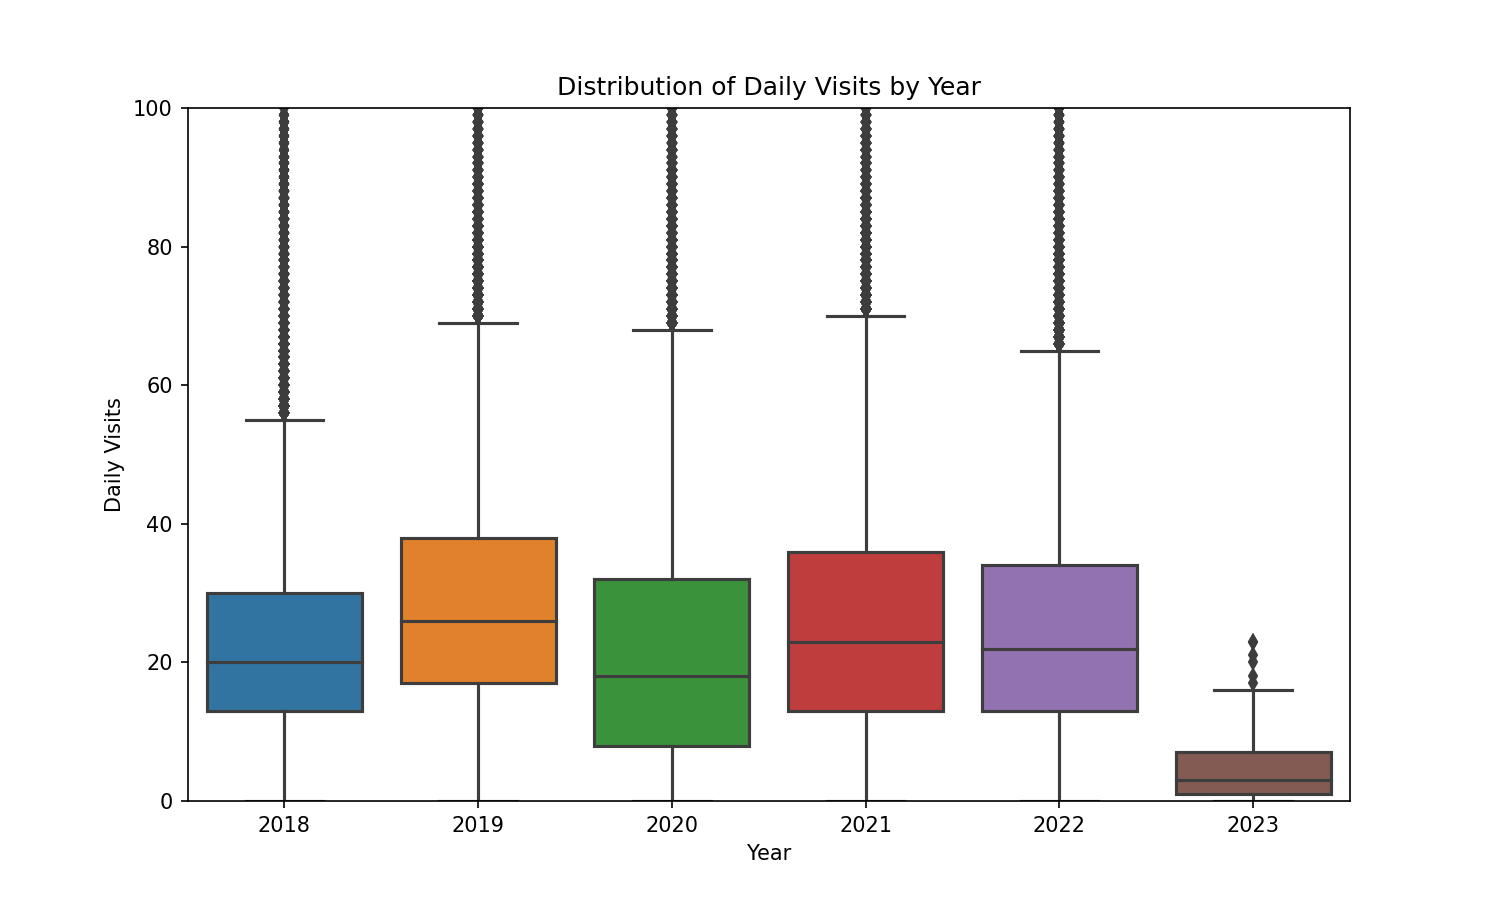

In [42]:
long['Year'] = long['date'].dt.year
dailyvisits_by_year = long.groupby('Year')['dailyvisits'].mean()

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='dailyvisits', data=long)
plt.title("Distribution of Daily Visits by Year")
plt.xlabel("Year")
plt.ylabel("Daily Visits")
plt.ylim(0,100)
plt.show()

One similarity between this graph and the line graph is that 2020 has a noticably lower mean
this makes sense as when you look at the line graph, at the red line indicating the date 
covid lockdowns began, avg monthly visits dropped significantly. Thus it makes sense that 
the mean of daily visits would have a similar dropoff. (ignore 2023 because there is only
like 2 days of data in that year)

In [43]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install geoplot

Note: you may need to restart the kernel to use updated packages.


In [45]:
import geopandas as gpd
import geoplot as gplt

C:\Users\mattm\AppData\Local\Temp\ipykernel_6248\2968205831.py:12: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  geoData = geoData.explode()


<IPython.core.display.Javascript object>


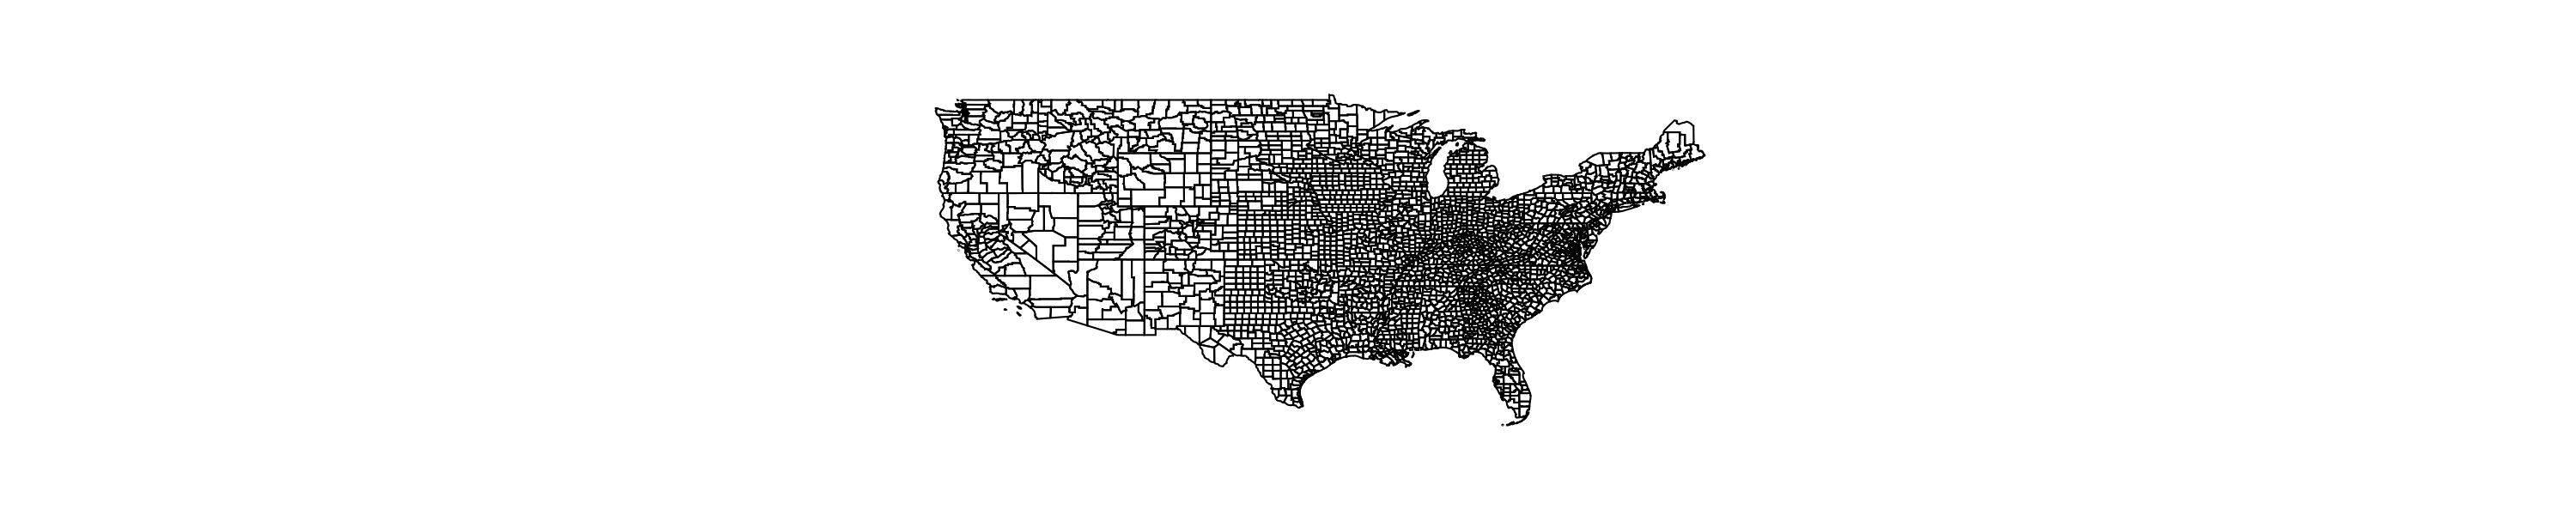

<Axes: >

In [46]:
# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
stateToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]

# Convert MultiPolygon geometries to individual Polygon geometries
geoData = geoData.explode()

# Basic plot with just county outlines
gplt.polyplot(geoData, figsize=(20, 4))

In [47]:
geoData['STATE'].nunique()

49

<IPython.core.display.Javascript object>


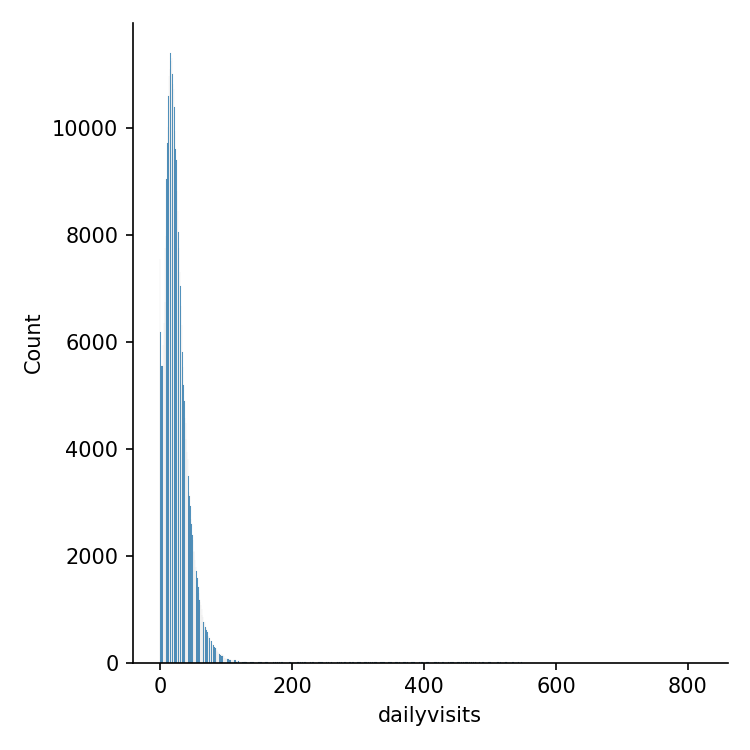

C:\Users\mattm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [48]:
sns.displot( long["dailyvisits"], kde=False, rug=False );

In [49]:
state_id = {
    'AL': '01', 'AK': '02', 'AZ': '04', 'AR': '05', 'CA': '06',
    'CO': '08', 'CT': '09', 'DE': '10', 'FL': '12', 'GA': '13',
    'HI': '15', 'ID': '16', 'IL': '17', 'IN': '18', 'IA': '19',
    'KS': '20', 'KY': '21', 'LA': '22', 'ME': '23', 'MD': '24',
    'MA': '25', 'MI': '26', 'MN': '27', 'MS': '28', 'MO': '29',
    'MT': '30', 'NE': '31', 'NV': '32', 'NH': '33', 'NJ': '34',
    'NM': '35', 'NY': '36', 'NC': '37', 'ND': '38', 'OH': '39',
    'OK': '40', 'OR': '41', 'PA': '42', 'RI': '44', 'SC': '45',
    'SD': '46', 'TN': '47', 'TX': '48', 'UT': '49', 'VT': '50',
    'VA': '51', 'WA': '53', 'WV': '54', 'WI': '55', 'WY': '56',
}

long['state_code'] = long['region'].map(state_id)

long.head()

,index,day,id,naics_code,region,raw_visit_counts,postal_code,city,safegraph_brand_ids,placekey,...,date,dayoftheweek,manyvisits,core_biz_area,weekend,period,year-month,monthlyvisits,Year,state_code
0,0,0,0,722511,MO,261,64081,Lees Summit,SG_BRAND_072efa4069c7217d82229845c60e6a0d,222-222@5pr-4pg-9fz,...,2018-12-24,Monday,0,1,0,before,2018-12-01,1044,2018,29
1,1,0,1,722511,TX,138,75455,Mount Pleasant,SG_BRAND_072efa4069c7217d82229845c60e6a0d,223-222@8f2-sqt-kj9,...,2018-08-27,Monday,0,1,0,before,2018-08-01,552,2018,48
2,2,0,2,722511,IL,111,61614,Peoria,SG_BRAND_072efa4069c7217d82229845c60e6a0d,223-222@5pv-mqc-t5f,...,2018-03-19,Monday,0,0,0,before,2018-03-01,444,2018,17
3,3,0,3,722511,NH,113,3820,Dover,SG_BRAND_072efa4069c7217d82229845c60e6a0d,zzw-222@62j-wsq-ysq,...,2018-05-07,Monday,0,0,0,before,2018-05-01,452,2018,33
4,4,0,4,722511,TX,175,76039,Euless,SG_BRAND_072efa4069c7217d82229845c60e6a0d,228-222@5qv-x6c-gzf,...,2018-02-12,Monday,0,1,0,before,2018-02-01,700,2018,48


In [50]:
long.groupby('state_code')
long.head()

,index,day,id,naics_code,region,raw_visit_counts,postal_code,city,safegraph_brand_ids,placekey,...,date,dayoftheweek,manyvisits,core_biz_area,weekend,period,year-month,monthlyvisits,Year,state_code
0,0,0,0,722511,MO,261,64081,Lees Summit,SG_BRAND_072efa4069c7217d82229845c60e6a0d,222-222@5pr-4pg-9fz,...,2018-12-24,Monday,0,1,0,before,2018-12-01,1044,2018,29
1,1,0,1,722511,TX,138,75455,Mount Pleasant,SG_BRAND_072efa4069c7217d82229845c60e6a0d,223-222@8f2-sqt-kj9,...,2018-08-27,Monday,0,1,0,before,2018-08-01,552,2018,48
2,2,0,2,722511,IL,111,61614,Peoria,SG_BRAND_072efa4069c7217d82229845c60e6a0d,223-222@5pv-mqc-t5f,...,2018-03-19,Monday,0,0,0,before,2018-03-01,444,2018,17
3,3,0,3,722511,NH,113,3820,Dover,SG_BRAND_072efa4069c7217d82229845c60e6a0d,zzw-222@62j-wsq-ysq,...,2018-05-07,Monday,0,0,0,before,2018-05-01,452,2018,33
4,4,0,4,722511,TX,175,76039,Euless,SG_BRAND_072efa4069c7217d82229845c60e6a0d,228-222@5qv-x6c-gzf,...,2018-02-12,Monday,0,1,0,before,2018-02-01,700,2018,48


In [51]:
#l = long.groupby('state_code')
#fullData = pd.merge(geoData, l, left_on=['STATE'], right_on=['state_code'])
#fullData.head(2)

In [52]:
# Initialize the figure
#fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color scheme:
#import mapclassify as mc
#scheme = mc.Quantiles(fullData['dailyvisits'], k=10)

# Map
#gplt.choropleth(fullData, 
#    hue="dailyvisits", 
#    linewidth=.1,
#    scheme=scheme, cmap='inferno_r',
#    legend=True,
#    edgecolor='black',
#    ax=ax
#);

#ax.set_title('daily visits by state ', fontsize=13);

In [53]:
# Load the json file with county coordinates
#geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

# Make sure the "id" column is an integer
#geoData.id = geoData.id.astype(str).astype(int)

# Remove Alaska, Hawaii, and Puerto Rico
#stateToRemove = ['02', '15', '72']
#geoData = geoData[~geoData.STATE.isin(stateToRemove)]

# Convert MultiPolygon geometries to individual Polygon geometries
#geoData = geoData.explode()

# Merge with your long DataFrame
#fullData = pd.merge(geoData, long, left_on=['STATE'], right_on=['state_code'])

# Set up the color scheme
#import mapclassify as mc

#scheme = mc.Quantiles(fullData['dailyvisits'], k=10)

 #Initialize the figure
#fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Create the choropleth map
#gplt.choropleth(fullData, 
#    hue="dailyvisits", 
#    linewidth=.1,
#    scheme=scheme, cmap='inferno_r',
#    legend=True,
#    edgecolor='black',
#    ax=ax
#)

#ax.set_title('Daily Visits by State', fontsize=13)
#plt.show()

1.)To see if the graph passes a smell test, I would look to Michigan. As seen in the bar chart,
Michigan has by faar the highest average dailyvisits, so the map should reflect this. 

2.)From the geographic information we can learn where in the country, chili's are the most popular. 

3.) Using this, we can identify specific locations to expand into. for example, it seems as though 
Chili's are abnormally successful in Michigan, so we could look into why that is the case, and potentially
see Michigan as a much better place for profitable future expansion as opposed to a state with very
low average dailyvisits count. 

All this information can be acquired from the state dailyvisits bar chart, so while my computer 
couldn't get the maps output due to memory error, I can still make the same decisions that could be
made based off of the map, but the bar graph isjust slightly less visually appealing

Thus I had to comment out all of the map code because I ran it for 3 hours and still got no output